# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от
публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Наши данные представляют собой таблицу из 23699 строк и 22 столбцов. Есть столбцы - претенденты на смену типа данных (например столбец "is_apartment", данные в котором должны быть булевыми, а не object, "floors_total" - количество этажей в здании должен иметь тип int64 (кол-во этажей не может быть дробным). Число балконов "balcony" тоже должно быть целым числом (вряд ли можно сдать квартиру с частично обвалившимся балконом) и иметь тип int64. Также можно перевести из float в int стоимость квартир (она округлена), длительность продажи (столбец "days_exposition")  и столбцы с картографическими данными. Но для этого в соответствующих столбцах не должно быть пропущенных значений.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При беглом взгляде на данные можно сказать, что в столбцах "last_price", "total_area", "floor", "parks_around3000", "days_exposition" очень большие расхождения средних и медианных значений. Так, в столбце "days_exposition" стандартное отклонение более, чем в два раза превышает среднее, поэтому замена пропусков на среднее, или на медианное значение не представляется правомерной (в этих столбцах). Возможно, в данных есть выбросы и артефакты. Их устранение - задача предобработки. 
Также в данных есть квартира с однометровыми потолками и нулевым количеством комнат.  В частности, уже методом describe обнаружена квартира со 100-метровыми потолками, шестидесятиэтажный дом (до 2019 года самым высоким домом в Спб был 42-этажный дом, после - 88-этажный, а 60-этажного дома не существует). Посмотрим, сколько значений пропущено в каждом столбце, а затем посмотрим, квартиры каких регионов фигурируют в данных.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения, причём от незначительного количества, как в столбце "floors_total" - 86 строк пропущено (пренебрежимо малое значение, меньше процента), так до подавляющего большинства как в столбце "is_apartment" (здесь пропущено 88% данных). Так, в столбце "ceiling_height" 9195 пропущенных значений (это примерно 40% данных), в столбце "living_area" 1903 пропущенных значения (это 8% данных) и т.д. Кроме того, в некоторых столбцах пропущено примерно равное кол-во данных, нужно проверить, пропущены ли они одновременно в стрках, или нет. Работа с пропусками - задача следующего шага.

In [7]:
len(data['locality_name'].unique())

365

Итого, мы имеем данные по 365 населённым пунктам. Посмотрим, входит ли в них Москва (является ли Москва соседним населённым пунктом по логике сборщиков данных).

In [8]:
data.query('locality_name == "Москва"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Нет, Москва не входит в наши 365 населённых пунктов. Тогда логично предположить, что самые высокие здания находятся в Спб. Три самых высоких здания Спб имеют 37, 42 и 88 этажей. Посмортим, какие высотные дома фигурируют в наших данных и много ли таких.

In [9]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Всего два дома с неправдоподобными значениями, они не внесут в наши данные сколько-нибудь значительные искажения. И будут отброшены на этапе построения ящика с усами.

Узнаем, сколько квартир находится в Санкт-Петербурге.

In [10]:
data.query('locality_name == "Санкт-Петербург"')['last_price'].count()

15721

15721 из 23699, т.е. 66% квартир расположены в Санкт-Петерьбурге.

### Вывод

Наши данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет — представляют собой таблицу размером (23699, 22). В таблице представлены данные по 365 населённым пунктам.


В столбцах "last_price", "total_area", "floor", "parks_around3000", "days_exposition" очень большие расхождения средних и медианных значений. Стоит посмотреть на то, как распределены данные в этих столбцах, построить диаграммы и отсечь неправдоподобные значения.


В 14 столбцах есть пропущенные значения, с этим предстоит разобраться на следующем этапе. В столбцах "parks_around3000" и "ponds_around3000" одинаковое число пропущенных значений. Стоит проверить, пропущены значения в одних и тех же строках, или нет. Это может быть ошибкой записи данных (мы знаем, что картографические данные были получены автоматически, следует ожидать ошибки записи данных). Более того, в столбцах "airports_nearest" и "cityCenters_nearest" близкое число пропущенных значений, этот факт стоит изучить.

### Шаг 2. Предобработка данных

Начнём с изучения пропущенных значений. Больше всего их в столбце "is_apartment". Кроме того, он должен иметь булев тип, а не object, как сейчас. Посмотрим, какие значения есть в этом столбце:

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Значит, у нас есть nan, False и True. Под апартаментами подразумеваются нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания; продаются в административных зданиях, а также в зданиях, имеющих статус гостиницы. В целом, на рынке недвижимости апартаментов сравнительно мало, поэтому логично предположить, что в процессе записи данных этот вопрос посчитали не важным (по умолчанию квартира - это все-таки жилое помещение). Заменим все значения nan на нули, а затем поменяем тип данных на булев: 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [13]:
data2 = data.copy() # поскольку я работаю в своей локальной тетрадке, чтобы иметь на всякий случай оригинал данных, 
#              я создам дубликат - data2 и все изменения буду вносить в них.
data2['is_apartment'] = data2['is_apartment'].fillna(0)
data2['is_apartment'] = data2['is_apartment'].astype('bool')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

У нас 11519 пропущенных данных о балконах. Скорее всего, если в квартире есть балкон, продавец укажет это в качестве преимущества при продаже. Значит, можно сделать вывод, что отсутствующие значения - это нули. Сделаем замену и преобразуем тип данных в integer:

In [14]:
data2['balcony'] = data2['balcony'].fillna(0)
data2['balcony'] = data2['balcony'].astype('int')

Теперь проверим гипотезу о том, что картографические данных ponds_around3000 и parks_around3000 пропущены в строках одновременно:

In [15]:
data2.loc[(data2['ponds_around3000'].isnull()) & (data2['parks_around3000'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таких строк 5518, значит, значения в этих столбцах пропускаются одновременно. Также мы видим, что и другие столбцы с картографическими данными содержат пропуски. Убедимся в этом, проверив, сколько строк содержат во всех одновременно столбцах с картографическими данными пропущенные значения.

In [16]:
data2.loc[(
    data2['airports_nearest'].isnull()) & (data2['cityCenters_nearest'].isnull()) & 
    (data2['parks_around3000'].isnull()) & (data2['parks_nearest'].isnull()) & 
    (data2['ponds_around3000'].isnull()) & (data2['ponds_nearest'].isnull())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Снова 5518 строк. Да, картографических данных не хватает в одних в строках одновременно. Скорее всего, это ошибка записи данных. Узнаем, сколько у нас есть строк, в которых содержатся все картографичесские данные (значения во всех столбцах не пропущены).

In [17]:
data2.loc[(
    data2['airports_nearest'].notna()) & (data2['cityCenters_nearest'].notna()) & 
    (data2['parks_around3000'].notna()) & (data2['parks_nearest'].notna()) & 
    (data2['ponds_around3000'].notna()) & (data2['ponds_nearest'].notna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,False,...,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,False,...,6.50,0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,False,...,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


Итого, у нас всего 4817 строк, в которых имеются все картографические данные. Для хорошего анализа этого мало, но перед нами не стоит задачи изучения влияния всех картографических данных на стоимость и скорость продажи квартир. Нас просят только посмотреть зависимости от удалённости квартиры до центра. А этих данных имеется 18180 (примерно 80%), что вполне достаточно для проведения анализа. Такая же ситуация с "locality_name" и "days_exposition". В "locality_name" всего 49 пропущенных значений. Поскольку большая часть квартир находится в Спб, мы можем заменить пропуски на "Санкт-Петербург".

In [18]:
data2['locality_name'] = data2['locality_name'].fillna('Санкт-Петербург')

Значимым столбцом среди картографических данных является "cityCenters_nearest", поскольку расстояние квартиры от центра города, предположительно, влияет на цену и скорость продажи квартиры. Это влияние нам предстоит изучить. На данном этапе данные не были заменены, это разумно сделать после категоризации данных. Логично, что расстояние до центра зависит от населённого пункта, можно взять медианное значение для данного населённого пункта. Для крупного города (Санкт-Петербурга) косвенным показателем расстояния до центра является стоимость квадратного метра (отрицательная корелляция: чем ближе к центру, тем дороже) и замена значения "cityCenters_nearest" на медианное может оказаться неадекватной. 
Для начала посмотрим распределение объявлений о продаже по населённым пунктам, в том числе подсчитаем, сколько пропущенных значений в столбцах "cityCenters_nearest" и "days_exposition" внутри каждой групп:


In [19]:
data2_groupd_by_locality = (data2.groupby('locality_name').
                            agg({'total_area': ['count'], 
                                'cityCenters_nearest': ['mean', 'median', lambda x: x.isnull().sum()], 
                                 'days_exposition': ['mean', 'median', lambda x: x.isnull().sum()]}))
data2_groupd_by_locality.head()
data2_groupd_by_locality.set_axis(['count','cityCenters_nearest_mean','cityCenters_nearest_median', 'cityCenters_nearest_NaN', 'days_exposition_mean', 'days_exposition_median', 'days_exposition_NaN'],axis='columns',inplace=True)
data2_groupd_by_locality.sort_values('count', ascending=False).head(10)


,count,cityCenters_nearest_mean,cityCenters_nearest_median,cityCenters_nearest_NaN,days_exposition_mean,days_exposition_median,days_exposition_NaN
locality_name,,,,,,,
Санкт-Петербург,15770,11600.449717,12243.0,69.0,182.988090,95.0,2084.0
посёлок Мурино,522,NaN,NaN,522.0,147.572534,72.0,5.0
посёлок Шушары,440,24243.387615,24212.0,4.0,156.102941,92.0,32.0
Всеволожск,398,NaN,NaN,398.0,197.085546,123.0,59.0
Пушкин,369,28745.375000,27930.5,1.0,209.579805,130.0,62.0
Колпино,338,32113.771513,32018.0,1.0,143.600649,74.0,30.0
посёлок Парголово,327,19924.776758,19311.0,0.0,155.503311,79.0,25.0
Гатчина,307,NaN,NaN,307.0,189.619403,99.5,39.0
деревня Кудрово,299,NaN,NaN,299.0,180.872910,80.0,0.0


Видим, что медиана и среднее значение "days_exposition" внутри группы заметно отличаются. Это означает, что мы имеем большой разброс данных и заменять длительность продажи квартиры на медиану для каждого региона не корректно. Таким образом, на данном этапе в столбце  "days_exposition" останутся нулевые значения.
 
Пропущенные данные в столбце "cityCenters_nearest" ведут себя по-другому: во-первых, мы имеем населённые пункты, где полностью отсутствуют данные по "cityCenters_nearest", здесь замена невозможна. При этом в столбцах, где данные пропущены частично, значения медианы и стреднего близки. Проверим, сколько данных можно заменить:

In [20]:
len(data2_groupd_by_locality.query('(cityCenters_nearest_NaN > 0) and cityCenters_nearest_median.isnull()'))

336

Таких данных всего 336 при том, что всего пропусков более пяти тысяч. Смысла в такой замене нет: мы восстановим слишком мало данных, при этом есть потенциальная угроза создать выброс в локальной точке (с конкретным расстоянием от центра) для Санкт-Петербурга. Т.е. при замене на среднее в Санкт-Петербурге мы испортим график зависимости стоимости от расстояния до центра. 
Другой вариант замены мог бы быть таким: у нас есть крупный город и все остальные. Можно подсчитать среднее по маленьгим городам, среднее по Спб и произвести соответствующую замену. Но далее нам нужно изучить зависимость цены квартиры от этого параметра, мы рискуем исказить зависимость, добавив более 5000 данных в одну конкретную точку. Как минимум это мжет исказить понимание ситуации на рынке недвижимости заказчиком исследования (который не проследит за всеми заменами).
Таким образом, в столбце "cityCenters_nearest" останутся пропуски.

У нас остались ещё пропущенные значения о высоте потолка, жилой площади и площади кухни. Во всех трёх столбцах данные отличаются не слишком большим разбросом (стандартное отклонение меньше среднего и медиана и среднее близки по значению), значит, можно заменить пропуски в этих столбцах на медианные значения.

In [21]:
kitchen_area_median = data2['kitchen_area'].median()
living_area_median = data2['living_area'].median()
#ceiling_height_median = data2['ceiling_height'].median()
data2['kitchen_area'] = round(data2['kitchen_area'].fillna(kitchen_area_median), 2)
data2['living_area'] = round(data2['living_area'].fillna(kitchen_area_median), 2)
#data2['ceiling_height'] = round(data2['ceiling_height'].fillna(ceiling_height_median), 2)
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,9.1,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,9.10,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,9.1,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Теперь заменим пропущенные значения на медианные для каждой высотности здания:

In [22]:
data2['ceiling_height'] = (data2.groupby('floors_total')['ceiling_height'].
                           apply(lambda x: x.fillna(x.median())))
data2['ceiling_height'].isna().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


87

Осталось 87 пропущенных значений (изначально было 9195), их можно заменить на медианное значение по всему датасету.

In [23]:
ceiling_height_median = data2['ceiling_height'].median()

data2['ceiling_height'] = round(data2['ceiling_height'].fillna(ceiling_height_median), 2)
data2['ceiling_height'].isna().sum()

0

Проверим, есть ли в наших данных дубликаты.

In [24]:
data2.duplicated().sum()

0

Дубликатов нет.

### Шаг 2. Вывод

Данные состоят из двух частей: записанные людьми и картографические данные, полученные автоматички. Соответственно, можно ожидать ошибки двух типов: описки/забытые записи (человеческий фактор) и ошибки автоматической записи данных. Действительно, у нас очень много пропущенных значений в картографических значениях, причём они распределены не случайным образом. Значимым столбцом среди них является "cityCenters_nearest", поскольку расстояние квартиры от центра города предположительно влияет на цену и скорость продажи квартиры. Это влияние нам предстоит изучить. На данном этапе данные не были заменены, поскольку группировка данных по населённым пунктам с целью заменить пропуски на медиану по группе не принесла желанного результата. Без этих данных изучение влияния удалённости квартиры от центра на стоимость остаётся репрезентативным.


Значения столбца "days_exposition" также не удалось заменить. Причиной пропущенных значений может быть ряд факторов: например, квартира не была продана до окончания срока длительности объявления о продаже (скорее всего данные были выгружены с некого сайта), или системе не удалось считать данные. В шаге 4 попробуем сгруппировать данные по дате объявления и посмотреть, как распределены пропуски.

Рад пропущенных значений удалось заменить: высоту потолка, жилую площадь, площадь кухни и название населённого пункта.

### Шаг 3. Посчитайте и добавьте в таблицу

Подсчитаем и добавим в таблицу цену квадратного метра:

In [25]:
data2['price_per_square_meter'] = round(data2['last_price']/ data2['total_area'])

In [26]:
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,9.1,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44092.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,9.1,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0


Добавим в таблицу день недели, месяц и год публикации объявления:

In [27]:
data2['first_day_exposition'] = pd.to_datetime(data2['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data2['year_exposition'] = data2['first_day_exposition'].dt.year # добавили год
data2['month_exposition'] = data2['first_day_exposition'].dt.month # добавим месяц
data2['week_day_exposition'] = data2['first_day_exposition'].dt.weekday # добавляем день недели
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,2019,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,2018,12,1
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,2015,8,3
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,9.1,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,2015,7,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,2018,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,2017,3,1
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,52542.0,2018,1,0
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44092.0,2018,2,6
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,9.1,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0,2017,3,1


Теперь нужно добавить этаж квартиры; варианты — первый, последний, другой. Для этого напишем функцию и применем метод apply

In [28]:
def floor_type_generation(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data2['floor_type'] = data2.apply(floor_type_generation, axis=1)

In [29]:
data2.groupby('floor_type')['days_exposition'].count()

floor_type
другой       15230
первый        2470
последний     2818
Name: days_exposition, dtype: int64

Мы категоризовали данные по нахождению в доме. Видим, что на первом и последнем этаже находится примерное одинаковое количество квартир, а большинство квартир - примерно 74% расположены на промежуточных этажах.

Добавим ещё соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [30]:
data2['living_to_total_area'] = round(data2['living_area'] / data2['total_area'], 2)
data2['kitchen_to_total_area'] = round(data2['kitchen_area'] / data2['total_area'], 2)

В предыдущем пункте была выдвинута гипотеза о том, что пропущенные данные в столбце days_exposition могут зависеть от года/месяца/дня публикации объявления. Для проверки сгруппируем данные по этим параметрам и построим сводные таблицы, подсчитаем нули в столбце "days_exposition":

In [31]:
data2_groupd_by_year = (data2.groupby('year_exposition').
                            agg({'total_area': ['count'], 
                                'cityCenters_nearest': ['mean', 'median', lambda x: x.isnull().sum()], 
                                 'days_exposition': ['mean', 'median', lambda x: x.isnull().sum()]}))
data2_groupd_by_year

total_area cityCenters_nearest                      \
                     count                mean   median <lambda_0>   
year_exposition                                                      
2014                   137        13005.304348  11096.0       22.0   
2015                  1191        12637.562245  11393.0      211.0   
2016                  2783        13940.849315  12874.0      593.0   
2017                  8190        14245.430726  13223.0     1759.0   
2018                  8519        14574.249641  13265.0     2258.0   
2019                  2879        13946.803450  13099.0      676.0   

                days_exposition                    
                           mean median <lambda_0>  
year_exposition                                    
2014                 910.983193  875.0       18.0  
2015                 648.035682  576.0       70.0  
2016                 320.748159  235.0       67.0  
2017                 158.955929  103.0      271.0  
2018                  94.337963   64.0      959.0  
2019                  30.931671   23.0     1796.0

Интересно сравнить поведение пропущенных данных в столбцах "cityCenters_nearest" и "days_exposition": видно, что разброс пропусков в столбце "cityCenters_nearest" примерно такой же, как разброс суммарного кол-ва объявлений. При этом потеря данных в столбце "days_exposition" происходит в основном в 2019 году. Напомним, что всего мы имеем 3181 пропуск в этом столбце. В 2018 году также много пропущенных данных. Посмотрим, в каких месяцах больше всего пропущенных данных:

In [32]:
data2_groupd_by_2017_month = (data2.loc[data2['year_exposition'] == 2017].groupby('month_exposition').
                            agg({'total_area': ['count'], 
                                 'days_exposition': ['mean', 'median', lambda x: x.isnull().sum()]}))

data2_groupd_by_2018_month = (data2.loc[data2['year_exposition'] == 2018].groupby('month_exposition').
                            agg({'total_area': ['count'], 
                                 'days_exposition': ['mean', 'median', lambda x: x.isnull().sum()]}))
data2_groupd_by_2019_month = (data2.loc[data2['year_exposition'] == 2019].groupby('month_exposition').
                            agg({'total_area': ['count'], 
                                 'days_exposition': ['mean', 'median', lambda x: x.isnull().sum()]}))
data2_groupd_by_2017_month

total_area days_exposition                  
                      count            mean median <lambda_0>
month_exposition                                             
1                       289      246.028881  181.0       12.0
2                       434      209.382423  139.0       13.0
3                       222      353.355450  335.0       11.0
4                       649      186.089905  132.0       15.0
5                       557      167.822344  114.0       11.0
6                       672      178.495413  122.0       18.0
7                       588      167.046018  116.0       23.0
8                       738      147.332398  101.0       25.0
9                       994      140.980392  102.0       25.0
10                      930      145.985442  100.0       37.0
11                     1230      114.584317   74.0       44.0
12                      887      116.782353   63.0       37.0

Из сводной таблицы мы видим, что данные очень неоднородны и пропущенные значения нельзя заменить на среднее, или на медиану (на основании того, что медиана и среднее сильно отличаются).

Создадим сводную таблицу, в которую поместим долю пропущенных данных в столбце "days_exposition" для каждого года и месяца:

In [33]:
data2_groupd_by_month = (data2.pivot_table(
    index=['month_exposition'], 
    columns='year_exposition', values="days_exposition",aggfunc=lambda x: x.isnull().sum()).reset_index())
data2_count_groupd_by_month = (data2.pivot_table(
    index=['month_exposition'], 
    columns='year_exposition', values="days_exposition",aggfunc='count').reset_index())
# data2_groupd_by_month = data2_groupd_by_month.join(data2_count_groupd_by_month, on='month_exposition', how='left', lsuffix='_missed', rsuffix='_total')
data2_groupd_by_month/(data2_groupd_by_month+data2_count_groupd_by_month)

year_exposition,month_exposition,2014,2015,2016,2017,2018,2019
0,0.5,NaN,0.171429,0.008197,0.041522,0.055649,0.354460
1,0.5,NaN,0.064516,0.027344,0.029954,0.047333,0.488330
2,0.5,NaN,0.052632,0.025714,0.049550,0.062622,0.594994
3,0.5,NaN,0.040000,0.011933,0.023112,0.137705,0.826360
4,0.5,NaN,0.061538,0.025057,0.019749,0.190789,0.983607
5,0.5,NaN,0.073684,0.008621,0.026786,0.092628,NaN
6,0.5,NaN,0.000000,0.007194,0.039116,0.105143,NaN
7,0.5,NaN,0.117021,0.079545,0.033875,0.108010,NaN
8,0.5,NaN,0.097826,0.040323,0.025151,0.119326,NaN
9,0.5,NaN,0.034014,0.048780,0.039785,0.156419,NaN


Потеря данных происходит преимущественно с середины 2018 года. Это доказывает, что пропуски - это незакрытые объявления.

### Шаг 3. Вывод

В таблицу были добавлены:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры: варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Было выявлено, что основная потеря данных в столбце "days_exposition" произошла начиная с сентября 2018 года, т.е. в конце отслеживаемого периода. Квартиры могли не успть купить до того, как был создан датасет.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Шаг 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков и длительность продажи.

Создадим список указанных параметров important_parameters1 и постром для них гистограммы: 

total_area


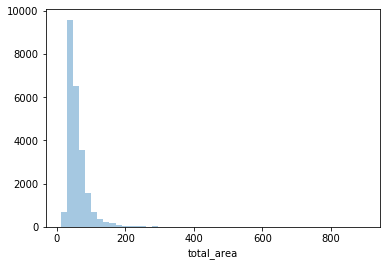

last_price


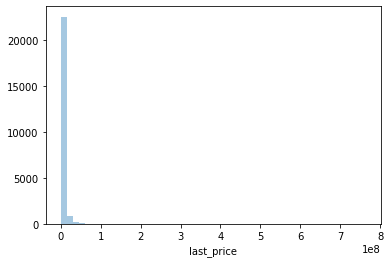

rooms


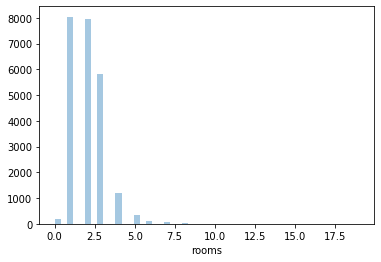

ceiling_height


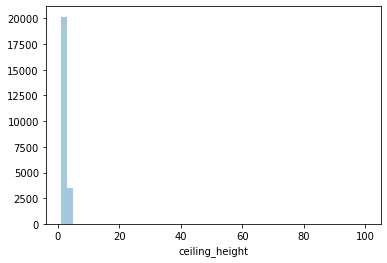

days_exposition


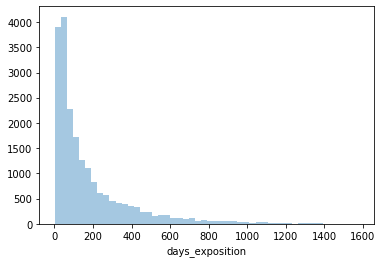

In [34]:
important_parameters1 = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for important_parameter in important_parameters1:
    print(important_parameter)
    sns.distplot(data2[important_parameter].dropna(), norm_hist=False, kde=False)
    
    plt.show()

Посмотрим поближе гистограмму площади квартир:

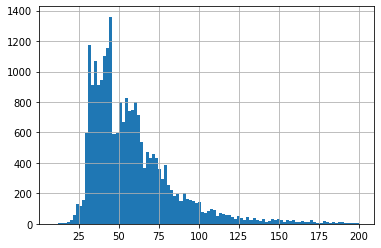

In [35]:
data2['total_area'].hist(bins=100, range=(10, 200)) 
plt.show()

Гистограмма выглядит достоверно: можно увидеть ступеньки, которые одусловлены распределением общей площади для одно-, двух- и т.д. -комнатных квартир. Также видим, что у гистограммы очень длинный правый хвост. Посмотрим на box plot:

[array([40., 12.]), array([ 69.9, 114.6])]

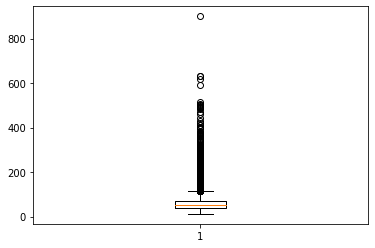

In [36]:
B = plt.boxplot(data2['total_area'])
[item.get_ydata() for item in B['whiskers']]

(0, 140)

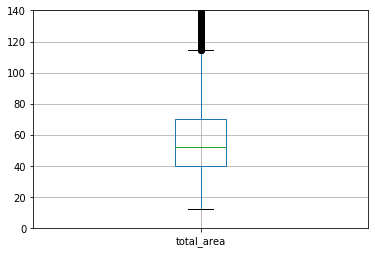

In [37]:
data2.boxplot(column='total_area')
plt.ylim(0, 140)

Из диаграммы размаха с большим масштабом мы видим, что есть много значений, не вошедших в правый ус. Из диаграммы с меньшим масштабом видно, что медиана не стремится к верхней границе ящика, значит, значения с большой площадью квартир - редкие. Можно их удалить. Для этого напишем сначала функцию, определяющую значение-границу правого и левого уса и отрезающую данные, не входящие внутрь усов и самого ящика.

In [38]:
def data_cleaning(df, name):
    """
    Функция принимает датафрейм и название контрольного столбца. 
    Строит box plot и получает список вида (q1, left_whisker), (q3, right_whisker), 
    где q1 и q3 - первая и третья квартиль,
    right_whisker - внешняя граница правого (на нашей диаграмме верхнего) уса,
    left_whisker - внешняя граница левого (на нашей диаграмме нижнего) уса.
    Далее создаётся новый датафрейм, в который входят только те строки, 
    значения которых в нашем контрольном столбце лежат внутри усов.
    
    """
    B = plt.boxplot(df[name])
    wiskers_scope = [item.get_ydata() for item in B['whiskers']] # получаем список вида 
    # (q1, left_whisker), (q3, right_whisker), где q1 и q3 - первая и третья квартиль
    right_whisker = wiskers_scope[1][1]
    left_whisker = wiskers_scope[0][1]
    data_new = df[(df[name] >= left_whisker) & (df[name] <= right_whisker)]
    return data_new


In [39]:
len(data2['total_area'])

23699

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.0,2019,3,3,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,2018,12,1,первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,95066.0,2018,9,0,другой,0.47,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,675.0,239.0,73718.0,2016,8,4,другой,0.64,0.13
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.0,2018,1,0,другой,0.64,0.14
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3.0,29.7,1,False,...,NaN,NaN,NaN,44092.0,2018,2,6,первый,0.52,0.16
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,9.1,12,False,...,3.0,196.0,602.0,149511.0,2017,3,1,другой,0.12,0.30


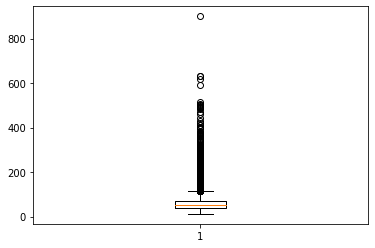

In [40]:
# завожу новый датафрейм data3 c очищенными данными
data3 = data_cleaning(data2, 'total_area')
data3

Построим новый box plot для нового датафрейма:

[array([39.4, 12. ]), array([ 65.6, 104.8])]

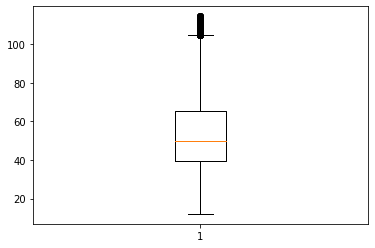

In [41]:
B = plt.boxplot(data3['total_area'])
[item.get_ydata() for item in B['whiskers']]

Видим, что границы ящика и положение усов сместились, выбросов стало гораздо меньше (они появились снова из-за смещения ящика). В основном в объявлениях встречаются квартиры площадью примерно от сорока до шестидесяти пяти квадратных метров.

Проделав такую очистку данных мы потерли 1240 строк, чуть больше 5% данных. В дальнейшем анализе других параметров также будем считать, что потеря до 6% данных считается допустимой. Проделаем то же теперь с "last_price":

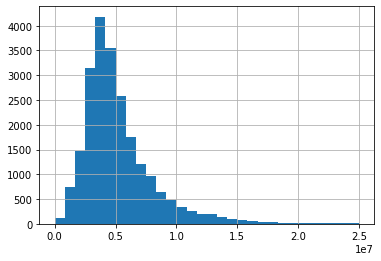

In [46]:
data3['last_price'].hist(bins=30,range=(0,2.5e+7)) 

Гистограмма очень странная, ничего не понятно, посмотрим на ящик с усами:

[array([3359000.,   12190.]), array([ 6300000., 10700000.])]

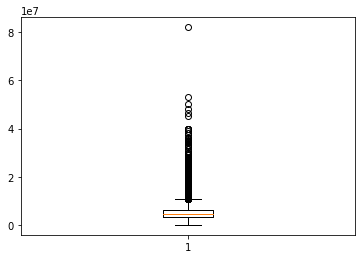

In [41]:
B = plt.boxplot(data3['last_price'])
[item.get_ydata() for item in B['whiskers']]

Снова видим, что у распределения очень длинный правый хвост. Уберём эти значения по аналогии со столбцом "total_area":

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,2018,12,1,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,95066.0,2018,9,0,другой,0.47,0.30
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,False,...,0.0,NaN,155.0,99196.0,2017,11,3,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.55,5.0,17.5,4,False,...,NaN,NaN,413.0,45000.0,2017,7,4,другой,0.58,0.20
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,675.0,239.0,73718.0,2016,8,4,другой,0.64,0.13
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.0,2018,1,0,другой,0.64,0.14
23696,18,2500000.0,56.7,2018-02-11,2,2.80,3.0,29.7,1,False,...,NaN,NaN,NaN,44092.0,2018,2,6,первый,0.52,0.16


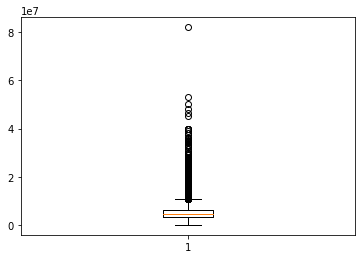

In [42]:
data3 = data_cleaning(data3, 'last_price')
data3

Посмотрим ещё раз на гистограмму:

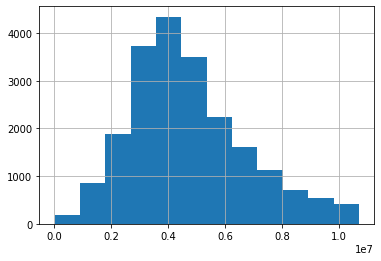

In [43]:
data3['last_price'].hist(bins=12) 
plt.show()

Видно, что в таблице осталось 21119 строк (на предыдущем этапе оставалось 22459), т.е. удалено менее 6% данных, что допустимо. Перейдём к изучению параметра "rooms". По гистограмме, построенной выше, видно, что есть квартиры с нулевым кол-вом комнат. Это нормально, если эти квартиры являются аппартаментами, студиями, или в квартире свободная планировка. Проверим, есть ли другие варианты:

In [44]:
data3.query('rooms == 0 and is_apartment == False and studio == False and open_plan == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area


Таких вариантов нет, посмотрим на ящик с усами:

(-2, 10)

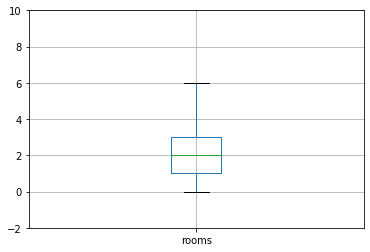

In [45]:
data3.boxplot(column='rooms')
plt.ylim(-2, 10)

Выбросов нет, очистка данных не нужна. Можно перейти к параметру высота потолков "ceiling_height". Здесь явно много подозрительных результатов, поскольку на гистограмме, построенной выше есть квартиры с высотой потолков до 20000 метров. Эти данные совершенно неправдоподобны. Посмотрим сразу на ящик с усами:

[array([2.55, 2.25]), array([2.75, 3.05])]

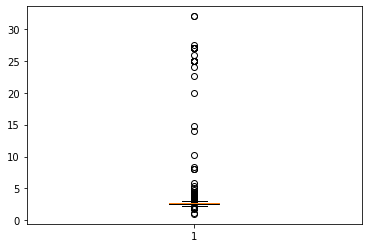

In [46]:
B = plt.boxplot(data3['ceiling_height'])
[item.get_ydata() for item in B['whiskers']]

In [47]:
right_whisker_ceiling_height = 3.05 # пунктом выше был построен ящик и вывдены значения границ ящика и усов
left_whisker_ceiling_height = 2.25
data3.query('ceiling_height <= @left_whisker_ceiling_height or ceiling_height >= @right_whisker_ceiling_height')['total_images'].count()


836

Таким образом, мы удалим всего 379 строк с выбросами. Воспользуемся готовой функцией:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,2018,12,1,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,95066.0,2018,9,0,другой,0.47,0.30
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,False,...,0.0,NaN,155.0,99196.0,2017,11,3,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.55,5.0,17.5,4,False,...,NaN,NaN,413.0,45000.0,2017,7,4,другой,0.58,0.20
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,675.0,239.0,73718.0,2016,8,4,другой,0.64,0.13
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.0,2018,1,0,другой,0.64,0.14
23696,18,2500000.0,56.7,2018-02-11,2,2.80,3.0,29.7,1,False,...,NaN,NaN,NaN,44092.0,2018,2,6,первый,0.52,0.16


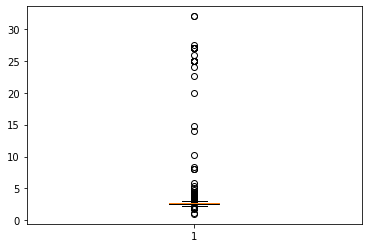

In [48]:
data3 = data_cleaning(data3, 'ceiling_height')
data3

Перейдём наконец к изучению времени продажи квартиры days_exposition. Посмотрим на гистограмму очищенных данных столбца: 

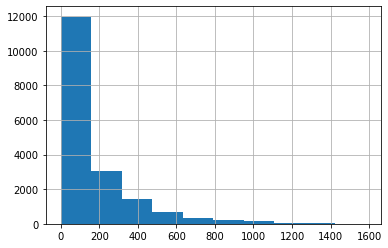

In [57]:
data3['days_exposition'].hist(bins=10) 
plt.show()

(0, 1200)

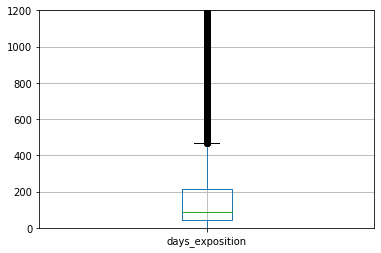

In [58]:
data3.boxplot(column='days_exposition') #здесь есть пропуски в данных, поэтому нельзя воспользоваться методом, который показывает
                                        #параметры усов
plt.ylim(0, 1200)

In [59]:
data3['days_exposition'].describe()

count    17932.000000
mean       168.977861
std        206.872471
min          1.000000
25%         43.000000
50%         89.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

На гистограмме видим распределение, похожее на распределение Пуассона. Продажа происходит быстро, если значения "days_exposition" лежат в первой квартили, т.е. все продажи до 43 дней - быстрые. Медленные продажи лежат в четвёртой квартили, т.е. медленными продажами мы назовём продажи дольше 214 дней. Медиана лежит ближе к нижней границе ящика, следовательно, квартиры продаются в основном быстро. 
Глядя на гистограмму и ящик с усами можно сказать, что начиная с ~~700~~ 1100 дней (дольше ~~двух~~ трёх лет) мы имеем редкие данные - выбросы. Их можно удалить.

In [60]:
long_exposition = 1100
data3 = data3.query('(days_exposition <= @long_exposition) or days_exposition.isnull()')
data3

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,2018,12,1,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,95066.0,2018,9,0,другой,0.47,0.30
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,False,...,0.0,NaN,155.0,99196.0,2017,11,3,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.55,5.0,17.5,4,False,...,NaN,NaN,413.0,45000.0,2017,7,4,другой,0.58,0.20
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,675.0,239.0,73718.0,2016,8,4,другой,0.64,0.13
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.0,2018,1,0,другой,0.64,0.14
23696,18,2500000.0,56.7,2018-02-11,2,2.80,3.0,29.7,1,False,...,NaN,NaN,NaN,44092.0,2018,2,6,первый,0.52,0.16


Создадим сводную таблицу data_describe_update, куда запишем характеристики первоначальных данных, полученных методом drscribe(), т.е. таблицы data2 и новых данных без выбросов (таблицы data3). Нам нужна статистика не по всем столбцам таблиц, а только по тем, которые входят в список important_parameters1, созданный в начале этого шага.

In [61]:
def data_describe_generation(df, columns):
    data_describe = pd.DataFrame()
    for column in columns:
        data_describe[column] = df[column].describe()
    return data_describe


In [62]:
data_describe_initial = data_describe_generation(data2, important_parameters1)
data_describe_update = data_describe_generation(data3, important_parameters1)
data_describe_combined = (data_describe_update.merge(data_describe_initial, 
                          left_index=True, right_index=True, suffixes=('_updated', '_initial')))
data_describe_combined

,total_area_updated,last_price_updated,rooms_updated,ceiling_height_updated,days_exposition_updated,total_area_initial,last_price_initial,rooms_initial,ceiling_height_initial,days_exposition_initial
count,20214.000000,2.021400e+04,20214.000000,20214.000000,17831.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,20518.000000
mean,51.451863,4.606038e+06,1.878846,2.652341,162.925859,60.348651,6.541549e+06,2.070636,2.735602,180.888634
std,16.841048,1.979482e+06,0.874568,0.138909,190.955246,35.654083,1.088701e+07,1.078405,0.994274,219.727988
min,12.000000,1.219000e+04,0.000000,2.250000,1.000000,12.000000,1.219000e+04,0.000000,1.000000,1.000000
25%,38.300000,3.250000e+06,1.000000,2.550000,43.000000,40.000000,3.400000e+06,1.000000,2.550000,45.000000
50%,47.800000,4.300000e+06,2.000000,2.600000,89.000000,52.000000,4.650000e+06,2.000000,2.650000,95.000000
75%,61.782500,5.700000e+06,3.000000,2.750000,210.000000,69.900000,6.800000e+06,3.000000,2.750000,232.000000
max,114.500000,1.070000e+07,6.000000,3.050000,1100.000000,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


#### Шаг 4.1 Вывод

Итак, были изучены следующие параметры: площадь, цена, число комнат, высота потолков и длительность продажи. Построены и проанализированы гистограммы распределения и диаграммы размаха. Все параметры, кроме числа комнат продверглись анализу и удалению редких и выбивающихся значений. 
Основной массив данных характеризуют следующие параметры: 

- характерная площадь квартир от 38 до 62 квадратных метров
- стоимость квартир от 3.3 до 5.7 млн. руб.
- в основном продают одно-, двух- и трёхкомнатные квартиры
- высота потолков 2.55 - 2.75 метра
- типичная длительность продажи от 42 до 210 дней. 

Соответственно, продажу можно считать быстрой, если она происходит в срок до 40 дней и долгой, если она превышает по длительности 210 дня.
В процессе очистки данных от выбросов и редких значений было удалено 3485 строк, что составляет 15% данных. Количество пропущенных данных в столбце "days_exposition" уменьшилось и составляет 11.8% (против 13.4% до очистки). Пропущенные данные не были учтены в анализе длительности продаж.

#### Шаг 4.2 Изучение зависимости цены от площади квартиры, числа комнат, удалённости от центра, а также влияния типа этажа и даты отправки объявления.

По аналогии с предыдущим шагом создадим список important_parameters2 для цены, площади квартиры, числа комнат и удалённости от центра. Построим для них матрицу рассеяния:

In [63]:
important_parameters2 = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a0edbf490>,
      dtype=object)

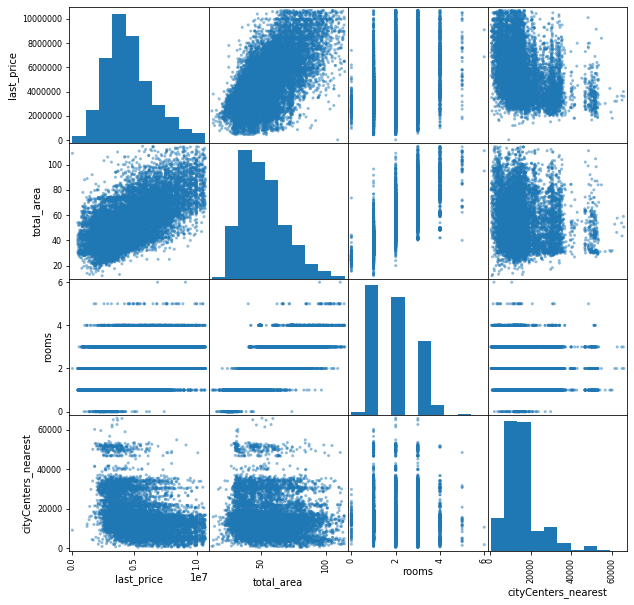

In [64]:
pd.plotting.scatter_matrix(data3[important_parameters2], figsize=(10, 10))

В первую очаредь нас интересует зависимость цены от остальных параметров. Из диаграмм можно одназначно сказать, что чем больше площадь квартиры, тем выше её цена. При этом отсутствует столь же чёткая корелляция с числом комнат, но в среднем двух- и трёхкомнатные квартиры отличаются более высокой ценой. На последней гистограмме заметна отрицательная корелляция цены и расстояния до центра города, что вполне логично, поскольку чем ближе квартира к центру (= чем меньше расстояние), тем квартира дороже. Подтвердим эти выводы, построив матрицу корреляции:

In [65]:
data3[important_parameters2].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.666295,0.414144,-0.309719
total_area,0.666295,1.000000,0.805307,-0.070902
rooms,0.414144,0.805307,1.000000,-0.035250
cityCenters_nearest,-0.309719,-0.070902,-0.035250,1.000000


По значениям в матрице можно выделить заметную корреляцию между стоимостью квартиры и площадью, при этом корелляция с числом комнат в квартире тоже есть, но она слабее. Связь стоимости квартиры и расстоянием до центра города характеризуется слабой отрицательной корреляцией. Можем сделать вывод о том, что самое большое влияние из указанных выше параметров на стоимость квартиры оказывает её площадь, удалённость от центра города и количество комнат также влияют на стоимость, но слабо.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом:

Сгруппируем данные по типу этажа:

In [68]:
data3_grouped_floor_type = (data3.groupby('floor_type').
                            agg({'last_price': 'mean'}).reset_index())
data3_grouped_floor_type

,floor_type,last_price
0,другой,4.803548e+06
1,первый,3.957640e+06
2,последний,4.153120e+06


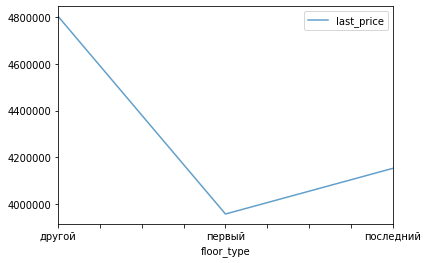

In [69]:
data3_grouped_floor_type.plot(x='floor_type', y='last_price', kind='line', alpha=0.7)

По графику видим, что средняя стоимость квартир на первых и последних этажах значительно ниже, чем на промежуточных (соответственно на 17% и 12.5% ниже).

Изучим также зависимость от даты размещения объявления: дня недели, месяца и года.

In [73]:
important_parameters3 = ['last_price', 'year_exposition', 'month_exposition', 'week_day_exposition']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a0df43990>,
      dtype=object)

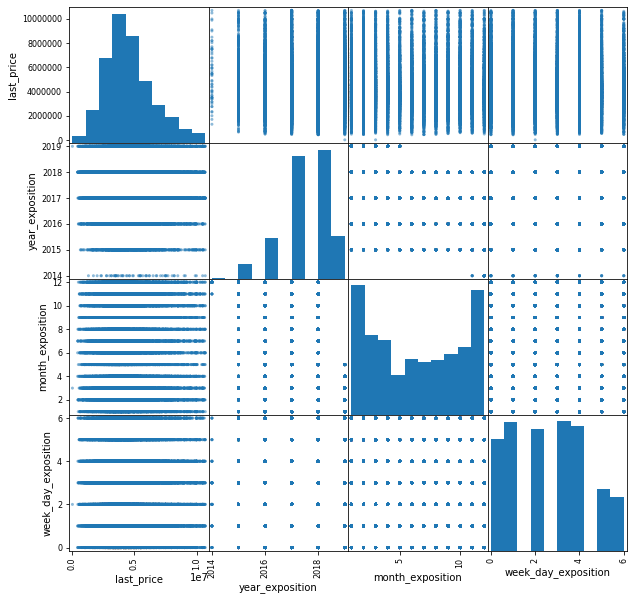

In [74]:
pd.plotting.scatter_matrix(data3[important_parameters3], figsize=(10, 10))

In [75]:
#data3[important_parameters3].corr()

Сгруппируем данные по годам, месяцам и дням недели, выведем графики зависимости средней по сгруппированным данным цены от параметра, по которому происходит группировка:

In [76]:
def grouped_data_plotting (data, parametrs):
    """
    Функция принимает датафрейм и названия столбцов, по которым будет производиться группировка. 
    Строит линейные графики зависимости средней стоимости квартиры внутри групп от уникальных значений в 
    столбцах, по которым производится группировка.
    
    """
    for parametr in parametrs:
        data_grouped = data.groupby(parametr).agg({'last_price': 'mean'}).reset_index()
        data_grouped.plot(x=parametr, y='last_price', kind='line', alpha=0.7)
        plt.show()

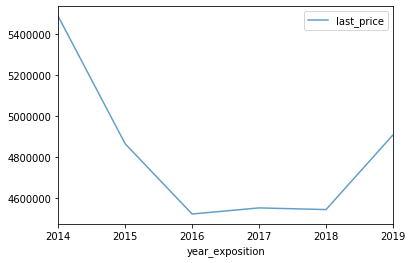

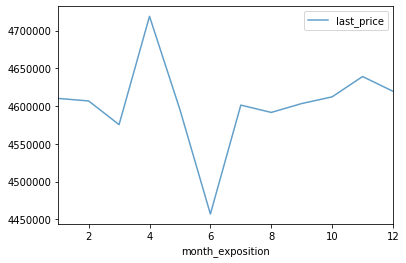

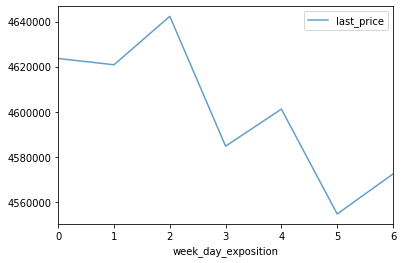

In [77]:
announcement_date = ['year_exposition', 'month_exposition', 'week_day_exposition']
grouped_data_plotting(data3, announcement_date)

#### Шаг 4.2 Вывод

Было изучено влияние различных параметров на стоимость квартир. Можно выделить заметную положительную корреляцию между стоимостью квартиры и её площадью, при этом корреляция с площадью квартиры тоже есть, но она заметно слабее. Связь стоимости квартиры с расстоянием до центра города характеризуется слабой отрицательной корреляцией: чем ближе квартира к центру, тем она дороже.

Доля дорогих квартир на промежуточных этажах заметно больше, чем на первом и последнем. Возможно, покупатели не хотят вкладывать деньги в квартиру с потенциальными проблемами со стороны крыши и подвала. При этом влияния данного фактора на стоимость квартиры не выявлено.

Проанализировав зависимость средней стоимости цены в категориях "первый этаж", "последний этаж" и "другой этаж", видим, что средняя стоимость квартир на первых и последних этажах значительно ниже, чем на промежуточных (соответственно на 17% и 12.5% ниже).

В среднем дешевле всего стоили квартиры в 2016 - 2018 годах. В среднем самые дорогие квартиры были выставлены на продажу в 2014 году, их стоимость в среднем на 18% выше, чем в годы низкой цены. 

По второму графику можно подумать, что самым выгодным для покупки квартиры является июнь, а взлёт средней цены на квартиры происходит в апреле. Относительная разница средней цены в апреле по сравнению с июнем составляет примерно 5%. Мы наблюдаем шум.

Так же обстоят дела на графике зависимости средней стоимость квартиры в зависимости от месяца. Здесь относительное изменение средней цены составляет 2%. Это тоже шум.
    
Исходя из относительного изменения цен для года, месяца и дня недели публикации объявления, можно сказать, что средняя стоимость зависит от года подачи объявления. Влияниями дня недели и месяца можно пренебречь.
    
Таким образом, из категориальных параметров самое сильное влияние на стоимость квартиры оказывает год подачи объявления, а на втором месте находится этаж.

#### Шаг 4.3 Подсчёт стоимости квартиры в зависимости от населённого пункта

Наша задача - подсчитать зависимость стоимости квартиры от её местоположения для десяти населённых пунктов с наибольшим числом объявлений. Для решения задачи сгруппируем данные из таблицы data3 по значениям столбца locality_name и выделим топ 10:

In [78]:
data3_groupd_by_locality_name = (data3.groupby('locality_name').
                            agg({'total_area': ['count'], 
                                'last_price': ['mean', 'median'], 
                                 'price_per_square_meter': ['mean', 'median']}))
                                

df = data3_groupd_by_locality_name
df.columns = ["_".join(col_names) for col_names in df.columns.values]
df.reset_index()
data3_groupd_by_locality_name = df.reset_index().sort_values(by = 'total_area_count', ascending = False)
data3_groupd_by_locality_name = data3_groupd_by_locality_name.head(10)
data3_groupd_by_locality_name

,locality_name,total_area_count,last_price_mean,last_price_median,price_per_square_meter_mean,price_per_square_meter_median
33,Санкт-Петербург,12568,5.375746e+06,4980000.0,104453.107495,101371.0
288,посёлок Мурино,518,3.667586e+06,3400000.0,85787.511583,86077.0
322,посёлок Шушары,434,4.057048e+06,3950000.0,78597.421659,76667.0
3,Всеволожск,387,3.679835e+06,3450000.0,66996.390181,65789.0
293,посёлок Парголово,325,4.477848e+06,4100000.0,90259.716923,91643.0
13,Колпино,324,3.774106e+06,3585000.0,75237.092593,74690.0
32,Пушкин,320,5.228478e+06,4900000.0,100237.806250,98455.0
6,Гатчина,298,3.395437e+06,3065000.0,68606.986577,67861.0
92,деревня Кудрово,297,4.198731e+06,3780000.0,92390.282828,91803.0
4,Выборг,214,2.994042e+06,2750000.0,57976.224299,57860.5


Создадим список топ 10 городов, где встречается больше всего объявлений:

In [79]:
top_10_location = data3['locality_name'].value_counts()[:10].index.tolist()
top_10_location

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'посёлок Парголово',
 'Колпино',
 'Пушкин',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [80]:
for locality, locality_data in data3.groupby('locality_name'):
    if locality in top_10_location:
        locality_data['price_per_square_meter']
        print(locality, locality_data['price_per_square_meter'].mean())

Всеволожск 66996.39018087856
Выборг 57976.22429906542
Гатчина 68606.9865771812
Колпино 75237.0925925926
Пушкин 100237.80625
Санкт-Петербург 104453.10749522597
деревня Кудрово 92390.28282828283
посёлок Мурино 85787.51158301158
посёлок Парголово 90259.71692307692
посёлок Шушары 78597.42165898618


#### Шаг 4.3 Вывод

Из данных были выбраны 10 населённых пунктов с наибольшим числом объявлений и посчитана средняя цена квадратного метра в этих населённых пунктах. Самая дорогая жилплощадь находится в Санкт-Петербурге, цена за квадратный метр составляет 104761 руб. Самая низкая стоимость жилья из списка в городе Выборг - 58053 руб. за квадратный метр.

#### Шаг 4.4 Изучение зависимости стоимости жилья от удалённости от центра города для Санкт-Петербурга

Наша задача - проанализировать график зависимости стоимости квадратного метра от удалённости от центра города. Для этого создадим для начала столбец, где расстояние переведено в км:

In [81]:
data3_SPB = data3.query('locality_name == "Санкт-Петербург"')
data3_SPB['cityCenters_nearest_km'] = round(data3_SPB['cityCenters_nearest'] / 1000)
data3_SPB              

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,week_day_exposition,floor_type,living_to_total_area,kitchen_to_total_area,cityCenters_nearest_km
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.75,24.0,9.1,22,False,...,NaN,NaN,110545.0,2019,4,3,другой,0.13,0.26,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289.0,88525.0,2017,2,6,другой,0.71,0.11,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,553.0,137.0,127525.0,2017,11,3,другой,0.51,0.21,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16,1,2.55,9.0,20.0,6,False,...,NaN,38.0,82051.0,2017,12,5,другой,0.51,0.28,17.0
23688,19,9200000.0,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,NaN,23.0,91089.0,2019,4,0,другой,0.62,0.15,14.0
23689,13,3550000.0,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,652.0,29.0,100567.0,2018,2,2,другой,0.46,0.26,16.0
23690,3,5500000.0,52.0,2018-07-19,2,2.55,5.0,31.0,2,False,...,NaN,15.0,105769.0,2018,7,3,другой,0.60,0.12,6.0


Подсчитаем среднюю цену для каждого километра:

In [82]:
data3_SPB_groupd_by_locality = (data3_SPB.groupby('cityCenters_nearest_km').
                            agg({'price_per_square_meter': 'mean'}).reset_index())
data3_SPB_groupd_by_locality

,cityCenters_nearest_km,price_per_square_meter
0,0.0,114373.666667
1,1.0,119317.593220
2,2.0,112897.210000
3,3.0,107175.891304
4,4.0,115434.050167
5,5.0,123115.514436
6,6.0,123306.207951
7,7.0,115919.910256
8,8.0,113651.894057
9,9.0,105553.226994


Построим линейный график

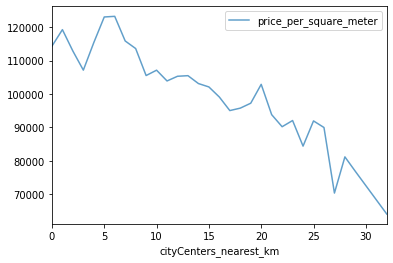

In [83]:
data3_SPB_groupd_by_locality.plot(x='cityCenters_nearest_km', y='price_per_square_meter', kind='line', alpha=0.7)

#### Шаг 4.4 Вывод

Был построен график зависимости стоимости жилья за один квадратный метр в зависимости от удалённости от центра Санкт-Петербурга. Наша задача - определить, какую область можно считать центром города. По графику видно, что примерно на 5-м - 6-м километре происходит изменение поведения функции. Точность такого определения не велика. Будем считать, что центром города является область внутри первых восьми километров.

#### Шаг 4.5.1 Изучение квартир в центре Санкт-Петербурга в сравнении со всем городом

Наша задача - изучить площадь квартир, число комнат, высоту потолков и стоимость квартир в центре Санкт-Петербурга, а затем сравнить поведение этих параметров внутри всего города. В предыдущем пункте мы решили определять центр города радиусом в ~~8~~ 6 км. Создадим соответствующий датафрейм:

In [84]:
data3_SPB_Center = data3_SPB.query('cityCenters_nearest_km <= 6')

Построим гистограммы для всех вышеперчисленных параметров. Для удобства сравнения будем откладывать по оси y нормированные величины и строить на одном графике гистограмму для центра и всего города:

total_area


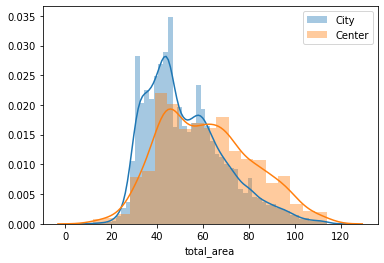

last_price


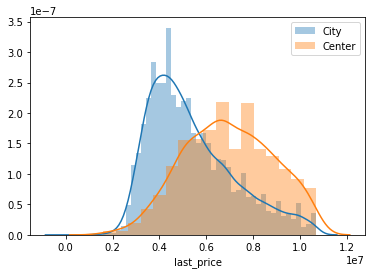

rooms


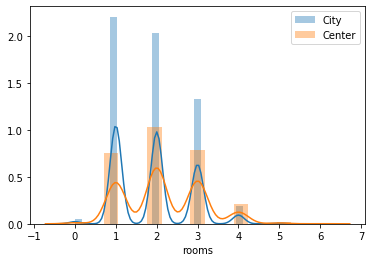

ceiling_height


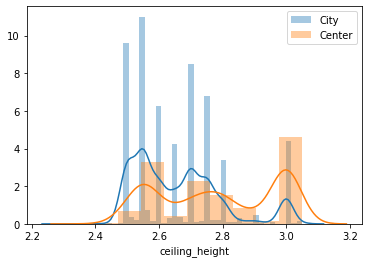

In [85]:
important_parameters_SPB = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for important_parameter in important_parameters_SPB:
    print(important_parameter)
    sns.distplot(data3_SPB[important_parameter], norm_hist=True, kde=True, label="City")
    sns.distplot(data3_SPB_Center[important_parameter], norm_hist=True, kde=True, label="Center")
    plt.legend()
    plt.show()

#### Шаг 4.5.1 Вывод

По построенным гистограммам можно сделать следующие выводы:

- по городу и в центре наиболее часто встречаются квартиры с примерно одинаковой площадью в 45 квадратных метров. При этом в центре города чаще встречаются квартиры с большей площадью (от 60 квадратных метров), а во всём городе чаще встречаются квартиры площадью до 45 квадратных метров соответственно.

- в центре города доля более дорогих квартир заметно выше

- на рынке недвижимости Санкт-Петербурга выше доля однокомнатных квартир, следом идут двух- и трёхкомнатные. В то же время в центре города наибольшая доля принадлежит двухкомнатным квартирам, а одно- и трёхкомнатные квартиры меняются местами, появляется заметная доля четырёкомнатных квартир. Одним словом, в центре можно чаще встретить квартиры с большим числом комнат

- во всём городе и в его центре наиболее часто встречаются квартиры с высотой потолков в 2.55, 2.7 и 3 м. Скорее всего это типовые хрущёвки, как раз высота потолков некоторых серий составляла именно такую величину. Доля квартир с более высокими потолками в центре города растёт.

#### Шаг 4.5.2 Изучение влияния различных параметров на стоимость квартир в Санкт-Петербурге и в его центре

Наша задача - выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) внутри центра города и по Санкт-Петербургу в целом. Поступим также как в пункте 4.2, используя датафреймы data3_SPB_Center и data3_SPB:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a0a16e890>,
      dtype=object)

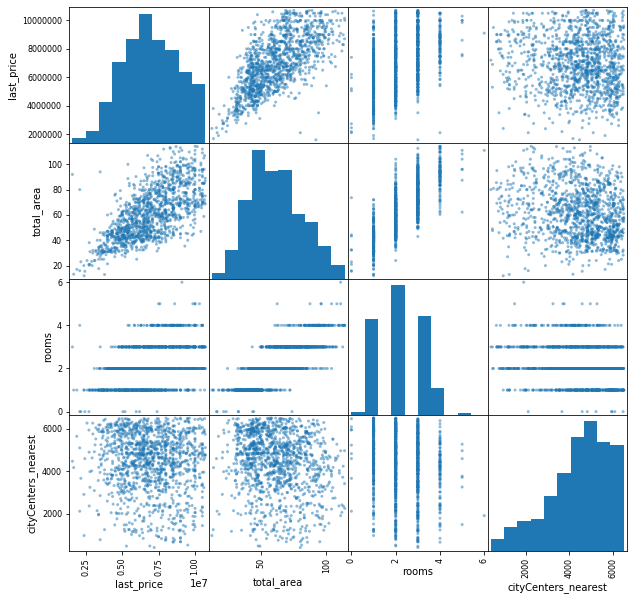

In [86]:
pd.plotting.scatter_matrix(data3_SPB_Center[important_parameters2], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a09f8a610>,
      dtype=object)

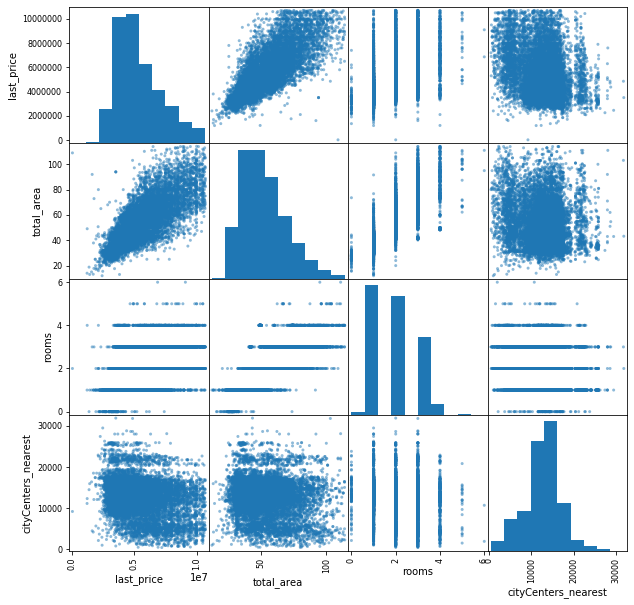

In [87]:
pd.plotting.scatter_matrix(data3_SPB[important_parameters2], figsize=(10, 10))

Для лучшего понимания ситуации построим матрицу корелляций для обоих датасетов:

In [88]:
data3_SPB_Center[important_parameters2].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.665574,0.425279,-0.080979
total_area,0.665574,1.000000,0.795154,-0.183924
rooms,0.425279,0.795154,1.000000,-0.214277
cityCenters_nearest,-0.080979,-0.183924,-0.214277,1.000000


In [89]:
data3_SPB[important_parameters2].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.782337,0.495368,-0.285471
total_area,0.782337,1.000000,0.793496,-0.117693
rooms,0.495368,0.793496,1.000000,-0.094700
cityCenters_nearest,-0.285471,-0.117693,-0.094700,1.000000


В целом, выводы такие же, как для всего датасета для всех населённых пунктов: можно выделить заметную корреляцию между стоимостью квартиры и её площадью, корреляция с числом комнат в квартире заметно слабее. Интересно, что те же параметры демонстрируют более сильную корреляцию для всего города, чем для его центра. Особенно это заметно для расстояния от центра города. Стоимость квартир в центральной части Санкт-Петербурга ещё меньше взаимосвязана с расстоянием до центра, что и понятно, поскольку обозначенный нами "центр города" - это не точка, а область радиусом 6 км, внутри нее нет преференций по расположению.

Изучим также зависимость стоимости жилья от даты размещения объявления: дня недели, месяца и года.

In [90]:
def grouped_datas_plotting (data1, data2, parametrs):
    """
    Функция принимает  два датафрейма и названия столбцов, по которым будет производиться группировка. 
    Строит в одной ячейке линейный график зависимости средней стоимости квартиры внутри групп от уникальных значений в 
    столбцах, по которым производится группировка, для каждого датафрейма.
    
    """
    for parametr in parametrs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        data1_grouped = data1.groupby(parametr).agg({'last_price': 'mean'}).reset_index()
        data2_grouped = data2.groupby(parametr).agg({'last_price': 'mean'}).reset_index()
        data1_grouped.plot(x=parametr, y='last_price', kind='line', alpha=0.7, ax=ax1, color="red")
        data2_grouped.plot(x=parametr, y='last_price', kind='line', alpha=0.7, ax=ax2, color="blue")
        ax1.set_ylabel("Center",color="red")
        ax2.set_ylabel("City",color="blue")
        fig.show()

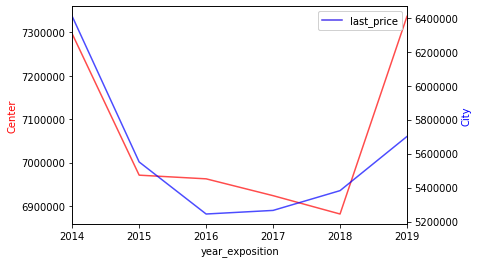

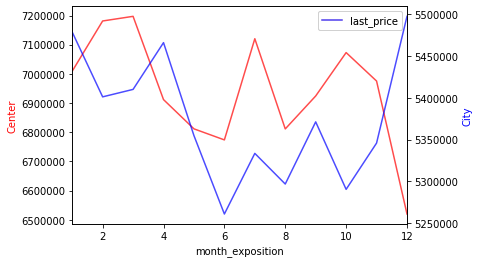

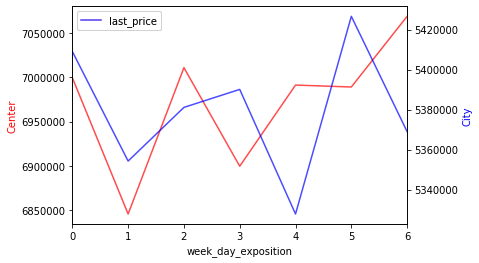

In [91]:
grouped_datas_plotting(data3_SPB_Center, data3_SPB, announcement_date)

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом:

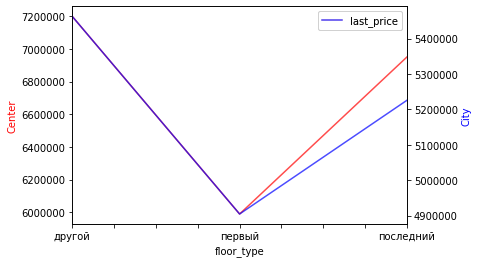

In [92]:
flor_type = ['floor_type']
grouped_datas_plotting(data3_SPB_Center, data3_SPB, flor_type)

#### Шаг 4.5.2 Вывод

Для центральной части Санкт-Петербурга и всего города в целом было изучено влияние различных параметров на стоимость квартир: число комнат, этаж, удалённость от центра, дата размещения объявления. Можно выделить заметную положительную корреляцию между стоимостью квартиры и её площадью, при этом корреляция с площадью квартиры тоже есть, но она заметно слабее. Связь стоимости квартиры с расстоянием до центра города характеризуется слабой отрицательной корреляцией: чем ближе квартира к центру, тем она дороже, но только для города в целом. Центральная область не демонстрирует такой корреляции.

Так же как и для полного датасета, значительным является только влияние года подачи объявления на стоимость. Качественно графики зависимоти средней цены от года для центра и всего Санкт-Петербурга меняются. В центре квартиры стоили дороже всего в 2019 году, а дешевле всего в 2018. Но относительный перепад не так велик, как для всего Спб, составляет около 6%. В то же время, самые дешёвые в среднем квартиры во всём городе продавались в 2016 году, а самые дорогие - в 2014. Относительное изменение стоимости составляет около 20%.
    
Качественная зависимость этажа, на котором находится квартира, на её стоимость для обеих частей города одинакова: в среднем самые низкие цены на первом этаже, а самые высокие - на промежуточном. Относительное изменение цены в максимуме и минимуме больше для центра города и составляет около 18%, для всего города - около 12%.
    
Таким образом, для центра города среди категориальных параметров самым важным оказывается этаж, а затем год. Для всего города ситуация обратная.

### Шаг 5. Общий вывод

Представлены данные по 365 населённым пунктам в Ленинградской области, при этом 66% квартир из объявлений находятся в самом Санкт-Петербурге.
После замены пропусков и очистки данных от редких значений и выбросов можно выделить следующие характерные параметры:

- характерная площадь квартир от 38 до 62 квадратных метров
- стоимость квартир от 3.3 до 5.7 млн. руб.
- в основном продают одно-, двух- и трёхкомнатные квартиры
- высота потолков 2.55 - 2.75 метра
- типичная длительность продажи от 42 до 210 дней.

Соответственно, продажу можно считать быстрой, если она происходит в срок до 40 дней и долгой, если она превышает по длительности 210 дня.

Мы изучили влияние таких факторов, как площадь квартиры, высота потолка, этаж, на котором расположена квартира, её удалённость от центра города и дата размещения объявления. Для оценки степени влияния использовались матрицы корреляций. Выявлена средняя корреляция стоимости квартиры с площадью и слабая корреляции с количеством комнат, т.е. это те факторы, которые оказывают самое заметное влияние. Между ценой квартиры и её удалённостью от центра слабая отрицательная корреляция, т.е. чем меньше расстояние до центра, тем дороже квартира. Из категориальных параметров самое сильное влияние на стоимость квартиры оказывает год подачи объявления, а на втором месте находится этаж.

Было произведено сравнение средней стоимости одного квадратного метра жилой недвижимости для топ 10 городов, где встречается больше всего объявлений. Самая дорогая жилплощадь находится в Санкт-Петербурге, её цена за квадратный метр составляет 104761 руб. Самая низкая стоимость жилья из данного списка - в городе Выборг - 58053 руб. за квадратный метр.

В ходе исследования была решена задача определения границ центра города для Санкт-Петербурга. Для этого мы изучили график зависимости стоимости одного квадратного метра жилплощади от её удалённости от центра города. Заметное изменение зависимоти произошло приблизительно на восьмом километре от центра города. Зону внитри первых восьми километров будем считать центром города Санкт-Петербурга.

Определение размера зоны, которую мы считаем центром города, было необходимо для сравнения площади квартир, числа комнат, высоты потолков и стоимости квартир внутри центра и для всего города целиком. Можно отметить следующие основные различия: в центре города квартиры заметно дороже и отличаются большей площадью. Тем не менее, средняя площадь для обеих зон одинакова - наиболее распространены в Санкт-Петербурге квартиры площадью 45 квадратных метров. В центре чаще встречаются более высокие квартиры, в то время как в городе в целом превалируют типичные постройки (скорее всего "хрущёвки") с высотой потолка в 2.55, 2.7 и 3 м. На рынке недвижимости Санкт-Петербурга выше доля однокомнатных квартир, следом идут двух- и трёхкомнатные. В то же время в центре города наибольшая доля принадлежит двухкомнатным квартирам, а одно- и трёхкомнатные квартиры меняются местами, появляется заметная доля четырёкомнатных квартир. Одним словом, в центре можно чаще встретить не только квартиры с большей площадью, но и с большим числом комнат и более высокими потолками.

Среди факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) самую заметрную корреляцию демонстрируют стоимостью квартиры и её площадь, корреляция с числом комнат в квартире заметно слабее. Интересно, что те же параметры демонстрируют более сильную корреляцию для всего города, чем для его центра (видимо, в центре на цену влияет фактор "элитности" конкретного дома). Особенно это заметно для расстояния от центра города: внутри центральной зоны в ~~8 км~~ 6 км нет преференций по расположению. Для центра города среди категориальных параметров самым важным оказывается этаж, а затем год. Для всего города ситуация обратная.